In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt
import os
import json
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sb

In [2]:
plt.rcParams["figure.figsize"] = (16, 8)

## Section I. - Compare ETH price to BTC, S&P500, Nasdaq, etc.

### ETH daily dataframe

#### Data information: 
    1499040000000,      // Open time
    0.01634790,       // Open
    0.80000000,       // High
    0.01575800,       // Low
    0.01577100,       // Close
    148976.11427815,  // Volume (in base asset ETH)
    1499644799999,      // Close time
    2434.19055334,    // Quote asset volume (in quote asset USDT)
    308,                // Number of trades
    1756.87402397,    // Taker buy base asset volume
    28.46694368,      // Taker buy quote asset volume
    17928899.62484339 // Ignore

In [3]:
df_eth = pd.read_csv("src/section1/daily/eth/ethereum_daily_df.csv")

In [4]:
df_eth.index = [dt.datetime.fromtimestamp(x/1000.0).date() for x in df_eth.datetime]

In [5]:
df_eth.drop(columns=["ignore", "datetime","close_time"], inplace=True)

In [6]:
df_eth.drop([dt.datetime.strptime("2023-03-08", "%Y-%m-%d")], inplace=True)

In [7]:
df_eth.tail()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
2023-03-03,1647.86,1649.25,1544.39,1569.45,742816.5976,1.166574e+09,1008133.0,356042.8657,5.589188e+08
2023-03-04,1569.45,1577.53,1549.12,1566.73,237640.2606,3.718656e+08,442158.0,114523.6396,1.792425e+08
2023-03-05,1566.74,1588.77,1553.05,1564.58,299240.7415,4.697291e+08,505034.0,146252.8571,2.295863e+08
2023-03-06,1564.57,1583.49,1554.44,1565.84,307709.3011,4.821468e+08,495130.0,151429.2666,2.373157e+08
2023-03-07,1565.84,1584.49,1536.14,1561.96,437947.9032,6.828656e+08,601157.0,222838.1714,3.474979e+08


### BTC

- price daily

In [8]:
df_btc = pd.read_csv("src/section1/daily/btc/btc_daily_df.csv")

In [9]:
df_btc.index = [dt.datetime.fromtimestamp(x/1000.0).date() for x in df_btc.datetime]

In [10]:
df_btc.drop(columns=["ignore", "datetime","close_time"], inplace=True)

In [11]:
df_btc.drop([dt.datetime.strptime("2023-03-08", "%Y-%m-%d")], inplace=True)

In [12]:
df_btc.tail()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
2023-03-03,23465.32,23476.95,21971.13,22354.34,319954.19785,7.167185e+09,8214639.0,156827.31366,3.512245e+09
2023-03-04,22354.34,22410.00,22157.08,22346.57,121257.38132,2.706423e+09,4169260.0,60043.33153,1.340205e+09
2023-03-05,22346.57,22662.09,22189.22,22430.24,154841.75786,3.473011e+09,4835978.0,77394.35765,1.735989e+09
2023-03-06,22430.24,22602.19,22258.00,22410.00,203751.82957,4.569102e+09,6471278.0,102110.26304,2.289889e+09
2023-03-07,22409.41,22557.91,21927.00,22197.96,292519.80912,6.517595e+09,7813394.0,145498.64219,3.242137e+09


### Fed effective funds rate - (monthly drill down)

The Federal Reserve's Effective Federal Funds Rate (EFFR) is the interest rate at which depository institutions (banks) lend reserve balances to other banks overnight, on an uncollateralized basis. The EFFR is a key benchmark rate for short-term interest rates in the United States and is set by the Federal Reserve's Federal Open Market Committee (FOMC).

The FOMC sets a target range for the EFFR at its regular meetings, and the actual rate is determined by market forces within that range. The FOMC adjusts the target range for the EFFR based on its assessment of economic conditions and its monetary policy objectives.

You can find the current and historical values for the EFFR on the Federal Reserve Bank of New York's website at the following link: https://apps.newyorkfed.org/markets/autorates/fed-funds-effective-rate.

In [13]:
df_fed_eff_funds_rate = pd.read_csv("src/section1/daily/fed_effective_funds_rate/fed_funds_rate_daily.csv")

In [14]:
df_fed_eff_funds_rate.index = df_fed_eff_funds_rate.time.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z').date())

In [15]:
df_fed_eff_funds_rate.drop(columns=["time"], inplace=True)

In [16]:
df_fed_eff_funds_rate = df_fed_eff_funds_rate[df_fed_eff_funds_rate.index >= dt.datetime.strptime("2017-09-01", "%Y-%m-%d").date()]

In [17]:
df_fed_eff_funds_rate.head()

,open,high,low,close
time,,,,
2017-09-01,1.15,1.15,1.15,1.15
2017-10-01,1.15,1.15,1.15,1.15
2017-11-01,1.16,1.16,1.16,1.16
2017-12-01,1.30,1.30,1.30,1.30
2018-01-01,1.41,1.41,1.41,1.41


### NASDAQ

- no weekends

In [18]:
df_nasdaq = pd.read_csv("src/section1/daily/nasdaq/nasdaq.csv")

In [19]:
df_nasdaq.index = df_nasdaq.time.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z').date())

In [20]:
df_nasdaq.drop(columns=["time"], inplace=True)

In [21]:
df_nasdaq[df_nasdaq.index >= dt.datetime.strptime("2017-09-01", "%Y-%m-%d").date()]

,open,high,low,close
time,,,,
2017-09-01,6001.8200,6009.6100,5972.2700,5987.9000
2017-09-05,5966.6400,5980.9100,5890.2500,5932.7300
2017-09-06,5949.5400,5964.3800,5909.9200,5951.1300
2017-09-07,5960.4400,5980.1500,5943.8900,5964.3100
2017-09-08,5957.1900,5958.8100,5907.9600,5913.3700
...,...,...,...,...
2023-03-01,12026.7197,12054.4767,11906.5788,11938.5666
2023-03-02,11830.0937,12074.5874,11830.0937,12044.8691
2023-03-03,12110.7053,12300.4569,12095.2416,12290.8072


### Real Estate Index

The S&P 500 is a stock market index that tracks the performance of 500 large-cap U.S. companies. While it does not include a specific real estate sector index, the S&P 500 does have a sector classification system that includes real estate investment trusts (REITs) as a separate sector.

The S&P 500 Real Estate sector includes companies that own, develop, and manage real estate properties, including REITs, real estate management and development firms, and homebuilders. The S&P 500 Real Estate sector was added to the S&P 500 index in September 2016, when the real estate sector was split off from the financial sector.

To track the performance of the S&P 500 Real Estate sector, you can use the ticker symbol SPGIX or any other ticker symbol that tracks the index. Additionally, you can find historical prices for the S&P 500 Real Estate sector on financial news websites like Yahoo Finance or Google Finance, or through a financial data provider like Bloomberg or FactSet.

In [22]:
df_real_estate = pd.read_csv("src/section1/daily/real_estate_index/real_estate_index.csv")

In [23]:
df_real_estate.index = df_real_estate.time.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z').date())

In [24]:
df_real_estate.drop(columns=["time"], inplace=True)

In [25]:
df_real_estate[df_real_estate.index >= dt.datetime.strptime("2017-09-01", "%Y-%m-%d").date()]

,open,high,low,close
time,,,,
2017-09-01,203.21,203.64,202.58,202.82
2017-09-05,202.90,203.43,201.42,202.68
2017-09-06,203.13,203.90,202.67,202.88
2017-09-07,203.11,204.80,203.06,204.42
2017-09-08,204.15,205.18,203.79,204.41
...,...,...,...,...
2023-03-01,238.10,238.65,234.73,236.19
2023-03-02,234.84,239.49,234.19,239.07
2023-03-03,240.76,243.69,240.60,243.22


### S&P500

- no weekends

In [26]:
df_sandp = pd.read_csv("src/section1/daily/s&p/sandp.csv")

In [27]:
df_sandp.index = df_sandp.time.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z').date())

In [28]:
df_sandp.drop(columns=["time"], inplace=True)

In [29]:
df_sandp[df_sandp.index >= dt.datetime.strptime("2017-09-01", "%Y-%m-%d").date()]

,open,high,low,close
time,,,,
2017-09-01,2474.42,2480.38,2473.85,2476.55
2017-09-05,2470.35,2471.97,2446.55,2457.85
2017-09-06,2463.83,2469.64,2459.20,2465.54
2017-09-07,2468.06,2468.62,2460.29,2465.10
2017-09-08,2462.25,2467.11,2459.40,2461.43
...,...,...,...,...
2023-03-01,3963.34,3971.73,3939.05,3951.40
2023-03-02,3938.68,3990.84,3928.16,3981.34
2023-03-03,3998.02,4048.29,3995.17,4045.65


### Silver price (Oz)

- from 2017-09-01

In [30]:
df_silver = pd.read_csv("src/section1/daily/silver/silver_daily.csv")

In [31]:
df_silver.index = [dt.datetime.strptime("2017-08-31", "%Y-%m-%d") + timedelta(days=x) for x in range(2016)]

In [32]:
df_silver.drop(columns="d", inplace=True)

In [33]:
df_silver.rename(columns={"v": "silver_value"}, inplace=True)

In [34]:
df_silver.head()

,silver_value
2017-08-31,17.46
2017-09-01,17.57
2017-09-02,17.73
2017-09-03,17.73
2017-09-04,17.83


### US breakeven inflation 

- Expected inflation in next 5-10 years

The US breakeven inflation rate is a market-based measure of expected inflation over a given time period. It is calculated as the difference between the yield of a nominal Treasury security (which includes an inflation expectation component) and the yield of an inflation-protected Treasury security (which is adjusted for inflation).

For example, if the yield on a 10-year nominal Treasury bond is 2.5% and the yield on a 10-year Treasury inflation-protected security (TIPS) is 0.5%, the breakeven inflation rate would be 2.0% (2.5% - 0.5%).

The US breakeven inflation rate can be used as an indicator of market expectations for future inflation. If the breakeven inflation rate is higher than the Federal Reserve's inflation target, it may indicate that investors expect inflation to be higher than the Fed's target over the relevant time period.

In [35]:
df_5_year_us_breakev_inf = pd.read_csv("src/section1/daily/us_breakeven_inflation/5_year.csv")
df_10_year_us_breakev_inf = pd.read_csv("src/section1/daily/us_breakeven_inflation/10_year.csv")

In [36]:
df_5_year_us_breakev_inf.index = df_5_year_us_breakev_inf.DATE
df_10_year_us_breakev_inf.index = df_10_year_us_breakev_inf.DATE

In [37]:
df_5_year_us_breakev_inf.drop(columns="DATE", inplace=True)
df_10_year_us_breakev_inf.drop(columns="DATE", inplace=True)

In [38]:
df_5_year_us_breakev_inf.rename(columns={"T5YIE": "us_breake_inf_rate_5y"}, inplace=True)

In [39]:
df_10_year_us_breakev_inf.rename(columns={"T10YIE": "us_breake_inf_rate_10y"}, inplace=True)

In [40]:
df_5_year_us_breakev_inf.tail()

,us_breake_inf_rate_5y
DATE,
2023-03-01,2.59
2023-03-02,2.65
2023-03-03,2.71
2023-03-06,2.7
2023-03-07,2.54


In [41]:
df_10_year_us_breakev_inf.tail()

,us_breake_inf_rate_10y
DATE,
2023-03-01,2.44
2023-03-02,2.48
2023-03-03,2.52
2023-03-06,2.49
2023-03-07,2.38


### US treasuries

- total volume at Fed Banks
- compares of 10 year treasuries vs 2 year vs 3 month yields

In [42]:
## if lower < 0 then recession expected
df_us_treasury_10yto2y = pd.read_csv("src/section1/daily/us_treasuries/compared/T10Y2Y.csv")
df_us_treasury_10yto3m = pd.read_csv("src/section1/daily/us_treasuries/compared/T10Y3M.csv")

In [43]:
df_us_treasury_10yto3m

,DATE,T10Y3M
0,2017-09-01,1.14
1,2017-09-04,.
2,2017-09-05,1.04
3,2017-09-06,1.03
4,2017-09-07,1.0
...,...,...
1433,2023-03-01,-0.89
1434,2023-03-02,-0.83
1435,2023-03-03,-0.94
1436,2023-03-06,-0.95


In [44]:
df_us_treasury_10yto2y.index = df_us_treasury_10yto2y.DATE
df_us_treasury_10yto3m.index = df_us_treasury_10yto3m.DATE

In [45]:
df_us_treasury_10yto2y.drop(columns="DATE", inplace=True)
df_us_treasury_10yto3m.drop(columns="DATE", inplace=True)

In [46]:
df_us_treasury_10yto2y.rename(columns={"T10Y2Y": "us_treasury_10yt2y_diff"}, inplace=True)

In [47]:
df_us_treasury_10yto3m.rename(columns={"T10Y3M": "us_treasury_10yt3m_diff"}, inplace=True)

In [48]:
df_us_treasury_10yto2y.tail()

,us_treasury_10yt2y_diff
DATE,
2023-03-01,-0.88
2023-03-02,-0.81
2023-03-03,-0.89
2023-03-06,-0.91
2023-03-07,-1.03


#### Total deposited volume - (monthly volume)

In [49]:
df_us_treasury_total_deposited = pd.read_csv("src/section1/daily/us_treasuries/total_deposited_volume/total_volume.csv")

In [50]:
df_us_treasury_total_deposited.index = df_us_treasury_total_deposited.time.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z').date())

In [51]:
df_us_treasury_total_deposited.drop(columns=["time"], inplace=True)

In [52]:
df_us_treasury_total_deposited = df_us_treasury_total_deposited[df_us_treasury_total_deposited.index >= dt.datetime.strptime("2017-09-01", "%Y-%m-%d").date()]

In [53]:
df_us_treasury_total_deposited.head()

,open,high,low,close
time,,,,
2017-09-01,100057000000,100057000000,100057000000,100057000000
2017-10-01,176376000000,176376000000,176376000000,176376000000
2017-11-01,176364000000,176364000000,176364000000,176364000000
2017-12-01,137422000000,137422000000,137422000000,137422000000
2018-01-01,236962000000,236962000000,236962000000,236962000000


### Gold (XAU) price (Oz)

- no weekends

In [54]:
df_gold = pd.read_csv("src/section1/daily/xau/xau_daily.csv")

In [55]:
df_gold.index = [dt.datetime.strptime("2017-08-31", "%Y-%m-%d") + timedelta(days=x) for x in range(2016)]

In [56]:
df_gold.drop(columns="d", inplace=True)

In [57]:
df_gold.rename(columns={"v": "gold_value"}, inplace=True)

In [58]:
df_gold.head()

,gold_value
2017-08-31,1311.90
2017-09-01,1320.37
2017-09-02,1324.97
2017-09-03,1324.97
2017-09-04,1334.53


## Merge all data

In [59]:
df_eth.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
2017-08-17,301.13,312.18,298.00,302.00,7030.71034,2.154655e+06,4522.0,6224.58999,1.908705e+06
2017-08-18,302.00,311.79,283.94,293.96,9537.84646,2.858947e+06,5658.0,7452.43542,2.240813e+06
2017-08-19,293.31,299.90,278.00,290.91,2146.19773,6.200226e+05,1795.0,1537.97550,4.447136e+05
2017-08-20,289.41,300.53,282.85,299.10,2510.13871,7.428479e+05,2038.0,2186.68739,6.475061e+05
2017-08-21,299.10,346.52,294.60,323.29,5219.44542,1.689472e+06,3925.0,4004.19967,1.297977e+06


In [60]:
df_eth["month"] = df_eth.index

In [61]:
df_eth.month = df_eth.month.apply(lambda x: x.strftime('%Y-%m-01'))

In [62]:
df_eth = df_eth[["month"] + [i for i in df_eth if i !="month"]]

In [63]:
df_eth.tail()

,month,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
2023-03-03,2023-03-01,1647.86,1649.25,1544.39,1569.45,742816.5976,1.166574e+09,1008133.0,356042.8657,5.589188e+08
2023-03-04,2023-03-01,1569.45,1577.53,1549.12,1566.73,237640.2606,3.718656e+08,442158.0,114523.6396,1.792425e+08
2023-03-05,2023-03-01,1566.74,1588.77,1553.05,1564.58,299240.7415,4.697291e+08,505034.0,146252.8571,2.295863e+08
2023-03-06,2023-03-01,1564.57,1583.49,1554.44,1565.84,307709.3011,4.821468e+08,495130.0,151429.2666,2.373157e+08
2023-03-07,2023-03-01,1565.84,1584.49,1536.14,1561.96,437947.9032,6.828656e+08,601157.0,222838.1714,3.474979e+08


In [64]:
df = df_eth.copy()

### Renaming for name convention

In [65]:
df_btc.rename(columns={"close": "btc_close", "volume": "btc_volume", "num_trades": "btc_num_trades", "qav": "btc_qav"}, inplace=True)

In [66]:
df_fed_eff_funds_rate.rename(columns={"close": "fed_eff_funds_rate_close"}, inplace=True)

In [67]:
df_nasdaq.rename(columns={"close": "nasdaq_close"}, inplace=True)

In [68]:
df_real_estate.rename(columns={"close": "real_estate_index_close"}, inplace=True)

In [69]:
df_sandp.rename(columns={"close": "sp500_close"}, inplace=True)

In [70]:
df_5_year_us_breakev_inf.index = pd.to_datetime(df_5_year_us_breakev_inf.index)
df_10_year_us_breakev_inf.index = pd.to_datetime(df_10_year_us_breakev_inf.index)

In [71]:
df_us_treasury_10yto2y.index = pd.to_datetime(df_us_treasury_10yto2y.index)
df_us_treasury_10yto3m.index = pd.to_datetime(df_us_treasury_10yto3m.index)

In [72]:
df_us_treasury_total_deposited.index = pd.to_datetime(df_us_treasury_total_deposited.index)
df_us_treasury_total_deposited.rename(columns={"close": "us_treasury_total_vol"}, inplace=True)

### Final steps

In [73]:
df = pd.merge(df, df_btc[["btc_close", "btc_volume", "btc_num_trades", "btc_qav"]], how="left", left_index=True, right_index=True)

In [74]:
df_fed_eff_funds_rate.index = df_fed_eff_funds_rate.index.astype("str") ## need for merging
df = pd.merge(df, df_fed_eff_funds_rate["fed_eff_funds_rate_close"], how="left", left_on="month", right_index = True)

In [75]:
df = pd.merge(df, df_nasdaq["nasdaq_close"], how="left", left_index=True, right_index=True)

In [76]:
df = pd.merge(df, df_real_estate["real_estate_index_close"], how="left", left_index=True, right_index=True)

In [77]:
df = pd.merge(df, df_sandp["sp500_close"], how="left", left_index=True, right_index=True)

In [78]:
df = pd.merge(df, df_silver, how="left", left_index=True, right_index=True)

In [79]:
df = pd.merge(df, df_5_year_us_breakev_inf, how="left", left_index=True, right_index=True)
df = pd.merge(df, df_10_year_us_breakev_inf, how="left", left_index=True, right_index=True)

In [80]:
df = pd.merge(df, df_us_treasury_10yto2y, how="left", left_index=True, right_index=True)
df = pd.merge(df, df_us_treasury_10yto3m, how="left", left_index=True, right_index=True)

In [81]:
df_us_treasury_total_deposited.index = df_us_treasury_total_deposited.index.astype("str") ## need for merging
df = pd.merge(df, df_us_treasury_total_deposited["us_treasury_total_vol"], how="left", left_on="month", right_index = True)

In [82]:
df = pd.merge(df, df_gold, how="left", left_index=True, right_index=True)

In [83]:
df.rename(columns= dict(zip([i for i in df.iloc[ : , 0:10] if i != "month"], ["eth_" + i for i in df.iloc[ : , 0:10] if i != "month"])), inplace=True)

In [84]:
### Nan columns (fed, nasdaq etc because of weekends)
df.columns[df.isnull().any()].tolist()

['btc_close',
 'btc_volume',
 'btc_num_trades',
 'btc_qav',
 'fed_eff_funds_rate_close',
 'nasdaq_close',
 'real_estate_index_close',
 'sp500_close',
 'silver_value',
 'us_breake_inf_rate_5y',
 'us_breake_inf_rate_10y',
 'us_treasury_10yt2y_diff',
 'us_treasury_10yt3m_diff',
 'us_treasury_total_vol',
 'gold_value']

In [85]:
### Fulfill nan values with the latest non-null value
for column in df.columns[df.isnull().any()].tolist():
    df[column].fillna(method='ffill', inplace=True)

In [86]:
for column in df.columns:
    if "us_" in column:
        df[column] = df[column].replace(".", np.nan)
        df[column].fillna(method="ffill", inplace=True)
        df[column] = df[column].astype("float64")

In [87]:
#df.to_csv("ethereum_df_withsec1.csv", index=True)

In [88]:
df.corr()

C:\Users\Dani\AppData\Local\Temp\ipykernel_33656\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,eth_open,eth_high,eth_low,eth_close,eth_volume,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,btc_close,...,nasdaq_close,real_estate_index_close,sp500_close,silver_value,us_breake_inf_rate_5y,us_breake_inf_rate_10y,us_treasury_10yt2y_diff,us_treasury_10yt3m_diff,us_treasury_total_vol,gold_value
eth_open,1.000000,0.999192,0.998107,0.997762,0.141932,0.715734,0.678048,0.138377,0.716445,0.920373,...,0.848174,0.829326,0.878546,0.661139,0.806091,0.755698,0.351075,0.516180,-0.029054,0.583639
eth_high,0.999192,1.000000,0.997958,0.998907,0.150852,0.725481,0.688178,0.147955,0.726913,0.922687,...,0.848236,0.827708,0.878128,0.663732,0.805800,0.755605,0.357373,0.519446,-0.026643,0.583530
eth_low,0.998107,0.997958,1.000000,0.998861,0.121169,0.692072,0.657048,0.118566,0.693879,0.920959,...,0.849595,0.832027,0.880411,0.658853,0.806771,0.756143,0.341776,0.509588,-0.031171,0.584768
eth_close,0.997762,0.998907,0.998861,1.000000,0.136898,0.709205,0.673741,0.134659,0.711414,0.923918,...,0.849373,0.829258,0.879236,0.662477,0.805058,0.754722,0.352905,0.515049,-0.027905,0.583962
eth_volume,0.141932,0.150852,0.121169,0.136898,1.000000,0.630269,0.698155,0.999070,0.629875,0.251494,...,0.389064,0.191712,0.313966,0.413222,0.043741,-0.001928,0.156511,0.076947,0.513109,0.487450
eth_qav,0.715734,0.725481,0.692072,0.709205,0.630269,1.000000,0.968366,0.627668,0.999525,0.730415,...,0.703701,0.605501,0.702381,0.653134,0.594504,0.554968,0.381244,0.414835,0.217026,0.561072
eth_num_trades,0.678048,0.688178,0.657048,0.673741,0.698155,0.968366,1.000000,0.696218,0.968985,0.708161,...,0.719963,0.589431,0.715709,0.655508,0.563586,0.525541,0.311237,0.321721,0.245384,0.594317
eth_taker_base_vol,0.138377,0.147955,0.118566,0.134659,0.999070,0.627668,0.696218,1.000000,0.628191,0.249877,...,0.386885,0.190266,0.312181,0.409294,0.043945,-0.001173,0.153225,0.074174,0.511812,0.482738
eth_taker_quote_vol,0.716445,0.726913,0.693879,0.711414,0.629875,0.999525,0.968985,0.628191,1.000000,0.733033,...,0.705699,0.607121,0.704469,0.654060,0.596811,0.557081,0.380482,0.415123,0.217639,0.562028
btc_close,0.920373,0.922687,0.920959,0.923918,0.251494,0.730415,0.708161,0.249877,0.733033,1.000000,...,0.877258,0.784375,0.872643,0.760551,0.726928,0.661544,0.502220,0.537403,0.172414,0.640703


## Section II.

### Sentiment analysed news,tweets,reddit comments + Whales transactions

In [93]:
df_coindesk = pd.read_csv("src/section2/final_dataframes/df_coindesk.csv")
df_cointelegraph = pd.read_csv("src/section2/final_dataframes/df_cointelegraph.csv")
df_googlenews = pd.read_csv("src/section2/final_dataframes/df_googlenews.csv")
df_googletrends = pd.read_csv("src/section2/final_dataframes/df_google_trends.csv")
df_reddit = pd.read_csv("src/section2/final_dataframes/df_reddit.csv")
## df_twitter
df_whales_transactions = pd.read_csv("src/section2/final_dataframes/df_whales_transactions.csv")

### Merge news

- Coindesk
- Cointelegraph
- Googlenews

In [94]:
df_coindesk.info() ## cointelegraph, googlenews same structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1511 non-null   object 
 1   headline         1511 non-null   object 
 2   short_text       1511 non-null   object 
 3   link             1511 non-null   object 
 4   long_text        1511 non-null   object 
 5   sentiment        1511 non-null   float64
 6   final_sentiment  1511 non-null   float64
dtypes: float64(2), object(5)
memory usage: 82.8+ KB


In [95]:
df_news = pd.concat([df_coindesk[["date", "final_sentiment"]], df_cointelegraph[["date", "final_sentiment"]], df_googlenews[["date", "final_sentiment"]]])

In [96]:
df_news.set_index("date", inplace=True)

In [98]:
df_news.shape

(7901, 1)

In [99]:
df_news = df_news.groupby("date").mean().sort_values(by="date")
df_news.rename(columns={"final_sentiment": "news_sentiment"}, inplace=True)

<AxesSubplot: xlabel='date'>

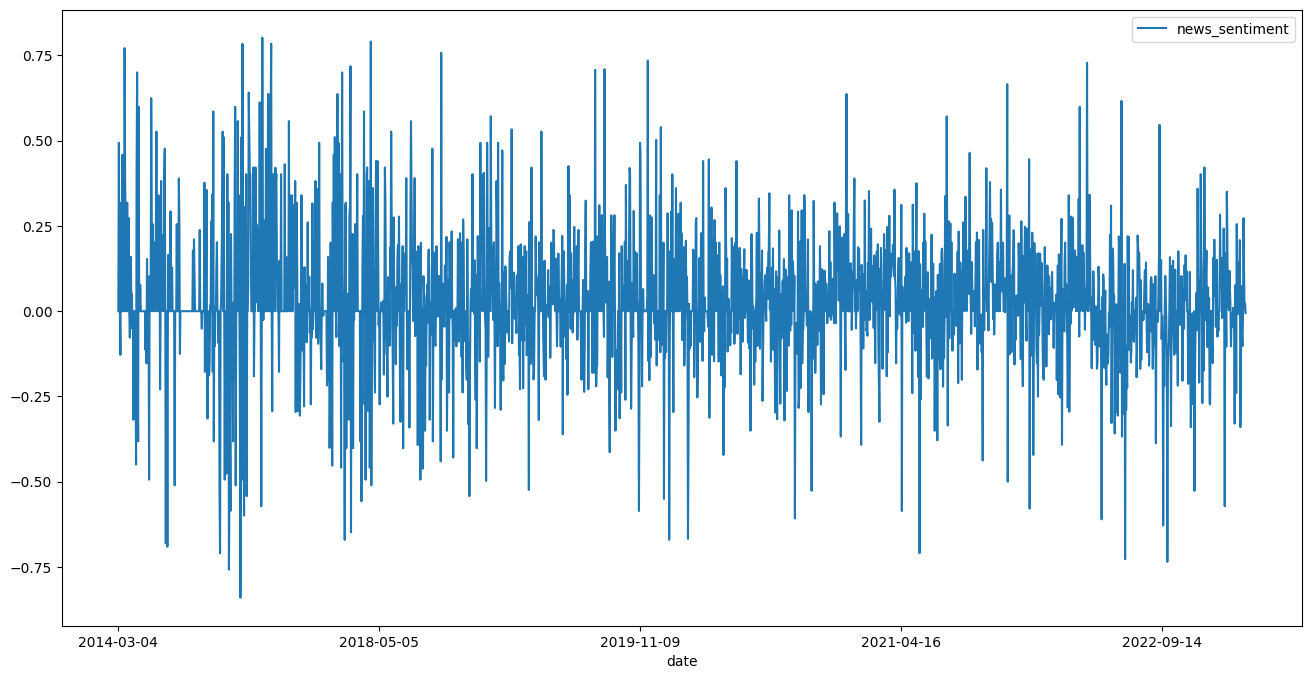

In [102]:
df_news.plot()

In [115]:
df_news["2017-09-01":].idxmax()

news_sentiment    2018-04-06
dtype: object

In [125]:
df_news = df_news["2017-09-01":]

In [126]:
df_news.index = pd.to_datetime(df_news.index)

In [127]:
df_news.head()

,news_sentiment
date,
2017-09-01,0.000000
2017-09-05,-0.217875
2017-09-07,-0.183300
2017-09-09,0.159100
2017-09-10,-0.072200


### Google Trends

- Monthly search trend - Ethereum topic

In [128]:
df_googletrends.month = df_googletrends.month + "-01"

In [129]:
df_googletrends.head()

,month,ethereum_search_trend
0,2017-09-01,16
1,2017-10-01,14
2,2017-11-01,23
3,2017-12-01,45
4,2018-01-01,44


### Reddit comments

- Filter on comments score > 0 (without spams)

In [130]:
df_reddit = df_reddit[df_reddit.score > 0]

In [131]:
df_reddit.rename(columns={"created_date": "date"}, inplace=True)

In [132]:
df_reddit.info()
df_reddit.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4462 entries, 0 to 4696
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4462 non-null   object 
 1   subreddit        4462 non-null   object 
 2   body             4462 non-null   object 
 3   score            4462 non-null   int64  
 4   stickied         4462 non-null   bool   
 5   final_sentiment  4462 non-null   float64
 6   total_score      4462 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 248.4+ KB


,date,subreddit,body,score,stickied,final_sentiment,total_score
0,2017-09-01,ethtrader,At the moment eth is being used as a store of...,5,False,0.594000,5
1,2017-09-02,underpopular,"This is going to be a long post, so please bea...",1,False,0.999300,1
2,2017-09-03,NEO,"Hi Everyone, is it just me, or does BTC and ET...",23,False,0.429612,33
3,2017-09-03,ethtrader,https://www.reddit.com/r/ethtrader/comments/6x...,6,False,0.181564,33
4,2017-09-03,ethtrader,You're either trolling us in regards to Howey ...,4,False,0.108570,33


In [133]:
def weighted_avg(df, values, weights):
    """
    Weight the average with the score of the reddit comment
    """
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()

In [134]:
df_reddit = pd.DataFrame(df_reddit.groupby("date").apply(weighted_avg, 'final_sentiment', 'score')).rename(columns={0: "reddit_sentiment"})

In [135]:
df_reddit.index = pd.to_datetime(df_reddit.index)

In [136]:
df_reddit.head()

,reddit_sentiment
date,
2017-09-01,0.594000
2017-09-02,0.999300
2017-09-03,0.345598
2017-09-04,0.755500
2017-09-05,0.297666


### Twitter tweets

- approx. 10 million

### Whales transactions

- Investigate Top 10k wallet-holder (based on ether volume) transactions

In [137]:
df_whales_transactions.set_index("block_date", inplace=True)

In [138]:
df_whales_transactions.drop(columns="total_value_in_wei", inplace=True)
df_whales_transactions.rename(columns={"transactions_number": "whales_tx_number", "total_value_in_eth": "whales_tx_total_value"}, inplace=True)
df_whales_transactions.index = pd.to_datetime(df_whales_transactions.index)

In [139]:
df_whales_transactions.head()

,unique_whales,whales_tx_number,whales_tx_total_value
block_date,,,
2017-09-01,34,15152,252097.047481
2017-09-02,23,11954,248823.974101
2017-09-03,20,10057,255170.337320
2017-09-04,29,14909,410476.448998
2017-09-05,31,14850,362925.798912


### Merge Section 2 dataframes

In [140]:
df = pd.merge(df, df_news, how="left", left_index=True, right_index=True)

In [141]:
df = df.merge(df_googletrends, how="left", left_on="month", right_on="month").set_index(df.index)

In [142]:
df = pd.merge(df, df_reddit, how="left", left_index=True, right_index=True)

In [143]:
# df_twitter

In [144]:
df = pd.merge(df, df_whales_transactions, how="left", left_index=True, right_index=True)

In [145]:
### Fulfill nan values with the latest non-null value
for column in df.columns[df.isnull().any()].tolist():
    df[column].fillna(method='ffill', inplace=True)

In [146]:
df.head()

,month,eth_open,eth_high,eth_low,eth_close,eth_volume,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,...,us_treasury_10yt2y_diff,us_treasury_10yt3m_diff,us_treasury_total_vol,gold_value,news_sentiment,ethereum_search_trend,reddit_sentiment,unique_whales,whales_tx_number,whales_tx_total_value
2017-08-17,2017-08-01,301.13,312.18,298.00,302.00,7030.71034,2.154655e+06,4522.0,6224.58999,1.908705e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-18,2017-08-01,302.00,311.79,283.94,293.96,9537.84646,2.858947e+06,5658.0,7452.43542,2.240813e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-19,2017-08-01,293.31,299.90,278.00,290.91,2146.19773,6.200226e+05,1795.0,1537.97550,4.447136e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-20,2017-08-01,289.41,300.53,282.85,299.10,2510.13871,7.428479e+05,2038.0,2186.68739,6.475061e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-21,2017-08-01,299.10,346.52,294.60,323.29,5219.44542,1.689472e+06,3925.0,4004.19967,1.297977e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Section III.

## Technical indicators

https://www.elearnmarkets.com/blog/best-25-technical-indicators/

### Momentum indicators

In [147]:
## MACD
def calculate_macd(price, slow, fast, smooth):
    """
    Calculate last 26, 12 day avg difference and 9 day signal line
    """
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'eth_close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    return macd, signal, hist

In [148]:
macd, signal, hist = calculate_macd(df['eth_close'], 26, 12, 9)

In [149]:
df["macd"] = macd
df["signal"] = signal
df["hist"] = hist

In [150]:
## RSI
def calculate_rsi(df, periods = 14, ema = True):
    """
    Returns a Series with the relative strength index.
    """
    close_delta = df.diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [151]:
df["rsi"] = calculate_rsi(df.eth_close)

In [152]:
df.head()

,month,eth_open,eth_high,eth_low,eth_close,eth_volume,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,...,news_sentiment,ethereum_search_trend,reddit_sentiment,unique_whales,whales_tx_number,whales_tx_total_value,macd,signal,hist,rsi
2017-08-17,2017-08-01,301.13,312.18,298.00,302.00,7030.71034,2.154655e+06,4522.0,6224.58999,1.908705e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
2017-08-18,2017-08-01,302.00,311.79,283.94,293.96,9537.84646,2.858947e+06,5658.0,7452.43542,2.240813e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.641368,-0.128274,-0.513094,NaN
2017-08-19,2017-08-01,293.31,299.90,278.00,290.91,2146.19773,6.200226e+05,1795.0,1537.97550,4.447136e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.379859,-0.378591,-1.001269,NaN
2017-08-20,2017-08-01,289.41,300.53,282.85,299.10,2510.13871,7.428479e+05,2038.0,2186.68739,6.475061e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.289391,-0.560751,-0.728641,NaN
2017-08-21,2017-08-01,299.10,346.52,294.60,323.29,5219.44542,1.689472e+06,3925.0,4004.19967,1.297977e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,0.725868,-0.303427,1.029295,NaN


In [153]:
### Stochastic
def calculate_smi(df, n=14, k=3, d=3):
    """
    Calculate Stochastic Momentum Indicator (SMI) for a given DataFrame.
    :param df: DataFrame containing 'High', 'Low', and 'Close' columns.
    :param n: Number of periods to use for %K calculation.
    :param k: Number of periods to use for %D calculation.
    :param d: Number of periods to use for smoothing %K.
    :return: A DataFrame with 'SMI' and 'SMI Signal' columns.
    """
    # Calculate highest high and lowest low over n periods
    high_max = df['eth_high'].rolling(n).max()
    low_min = df['eth_low'].rolling(n).min()

    # Calculate %K and %D using highest high and lowest low
    k_percent = 100 * (df['eth_close'] - low_min) / (high_max - low_min)
    d_percent = k_percent.rolling(k).mean().rolling(d).mean()

    # Calculate the SMI
    smi = k_percent - d_percent

    # Calculate the SMI Signal
    smi_signal = smi.rolling(3).mean()

    return smi, smi_signal

In [154]:
smi, smi_signal = calculate_smi(df)

In [155]:
df["smi"] = smi
df["smi_signal"] = smi_signal

### Trend indicators

In [156]:
### Moving Average
def calculate_ma(df):
    """
    Calculate 12-day and 26-day moving averages for a given DataFrame.
    :param df: DataFrame containing 'Close' column.
    :return: A DataFrame with 'MA 12' and 'MA 26' columns.
    """
    # Calculate the 12-day and 26-day moving averages using rolling window
    ma_12 = df['eth_close'].rolling(window=12).mean()
    ma_26 = df['eth_close'].rolling(window=26).mean()

    return ma_12, ma_26

In [157]:
ma_12, ma_26 = calculate_ma(df)

In [158]:
df["ma_12"] = ma_12
df["ma_26"] = ma_26

In [159]:
df.tail()

,month,eth_open,eth_high,eth_low,eth_close,eth_volume,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,...,whales_tx_number,whales_tx_total_value,macd,signal,hist,rsi,smi,smi_signal,ma_12,ma_26
2023-03-03,2023-03-01,1647.86,1649.25,1544.39,1569.45,742816.5976,1.166574e+09,1008133.0,356042.8657,5.589188e+08,...,70251.0,632832.176035,9.490106,18.102317,-8.612212,44.984486,-32.418657,-7.404311,1635.137500,1619.542308
2023-03-04,2023-03-01,1569.45,1577.53,1549.12,1566.73,237640.2606,3.718656e+08,442158.0,114523.6396,1.792425e+08,...,56069.0,186043.394232,4.027388,15.287331,-11.259944,44.719157,-26.376173,-18.186120,1623.759167,1617.713077
2023-03-05,2023-03-01,1566.74,1588.77,1553.05,1564.58,299240.7415,4.697291e+08,505034.0,146252.8571,2.295863e+08,...,55417.0,157885.706665,-0.469926,12.135880,-12.605806,44.495751,-15.426672,-24.740501,1615.827500,1613.618846
2023-03-06,2023-03-01,1564.57,1583.49,1554.44,1565.84,307709.3011,4.821468e+08,495130.0,151429.2666,2.373157e+08,...,57322.0,561503.516236,-3.887594,8.931185,-12.818779,44.670203,-4.575024,-15.459290,1609.385833,1610.365385
2023-03-07,2023-03-01,1565.84,1584.49,1536.14,1561.96,437947.9032,6.828656e+08,601157.0,222838.1714,3.474979e+08,...,58356.0,363344.055416,-6.830467,5.778855,-12.609322,44.209404,5.210767,-4.930310,1602.005000,1611.004231


In [160]:
### Exponential Moving Average
def calculate_ema(df):
    """
    Calculate 12-day and 26-day exponential moving averages for a given DataFrame.
    :param df: DataFrame containing 'Close' column.
    :return: A DataFrame with 'EMA 12' and 'EMA 26' columns.
    """
    # Calculate the 12-day and 26-day exponential moving averages using ewm method
    ema_12 = df['eth_close'].ewm(span=12, adjust=True).mean() ## Adjust True to be weighted for the closest data
    ema_26 = df['eth_close'].ewm(span=26, adjust=True).mean()

    return ema_12, ema_26

In [161]:
ema_12, ema_26 = calculate_ema(df)

In [162]:
df["ema_12"] = ma_12
df["ema_26"] = ma_26

### Volume indicators

In [163]:
### On-Balance Indicator
def calculate_obv(df):
    copy = df.copy()
    obv = (np.sign(copy["eth_close"].diff()) * copy["eth_volume"]).fillna(0).cumsum()
    return obv

In [164]:
df["obv"] = calculate_obv(df)

In [165]:
### Money-Flow Index
def calculate_mfi(df, period=14):
    
    high = df["eth_high"]
    low = df["eth_low"]
    close = df["eth_close"]
    volume = df["eth_volume"]
    
    typical_price = (high + low + close) / 3 ## mean of high, low, close
    
    raw_money_flow = typical_price * volume
    
    positive_money_flow = pd.DataFrame(np.where(typical_price > typical_price.shift(1), raw_money_flow, 0))
    negative_money_flow = pd.DataFrame(np.where(typical_price < typical_price.shift(1), raw_money_flow, 0))
    
    positive_money_flow_sum = positive_money_flow.rolling(window=period).sum()
    negative_money_flow_sum = negative_money_flow.rolling(window=period).sum()
    
    money_ratio = positive_money_flow_sum / negative_money_flow_sum
    money_flow_index = 100 - (100 / (1 + money_ratio))
    
    return money_flow_index[0].values

In [166]:
df["mfi"] = calculate_mfi(df)

In [167]:
df

,month,eth_open,eth_high,eth_low,eth_close,eth_volume,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,...,hist,rsi,smi,smi_signal,ma_12,ma_26,ema_12,ema_26,obv,mfi
2017-08-17,2017-08-01,301.13,312.18,298.00,302.00,7030.71034,2.154655e+06,4522.0,6224.58999,1.908705e+06,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
2017-08-18,2017-08-01,302.00,311.79,283.94,293.96,9537.84646,2.858947e+06,5658.0,7452.43542,2.240813e+06,...,-0.513094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.537846e+03,NaN
2017-08-19,2017-08-01,293.31,299.90,278.00,290.91,2146.19773,6.200226e+05,1795.0,1537.97550,4.447136e+05,...,-1.001269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.168404e+04,NaN
2017-08-20,2017-08-01,289.41,300.53,282.85,299.10,2510.13871,7.428479e+05,2038.0,2186.68739,6.475061e+05,...,-0.728641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.173905e+03,NaN
2017-08-21,2017-08-01,299.10,346.52,294.60,323.29,5219.44542,1.689472e+06,3925.0,4004.19967,1.297977e+06,...,1.029295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.954460e+03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-03,2023-03-01,1647.86,1649.25,1544.39,1569.45,742816.59760,1.166574e+09,1008133.0,356042.86570,5.589188e+08,...,-8.612212,44.984486,-32.418657,-7.404311,1635.137500,1619.542308,1635.137500,1619.542308,3.706143e+07,46.163045
2023-03-04,2023-03-01,1569.45,1577.53,1549.12,1566.73,237640.26060,3.718656e+08,442158.0,114523.63960,1.792425e+08,...,-11.259944,44.719157,-26.376173,-18.186120,1623.759167,1617.713077,1623.759167,1617.713077,3.682379e+07,42.075393
2023-03-05,2023-03-01,1566.74,1588.77,1553.05,1564.58,299240.74150,4.697291e+08,505034.0,146252.85710,2.295863e+08,...,-12.605806,44.495751,-15.426672,-24.740501,1615.827500,1613.618846,1615.827500,1613.618846,3.652455e+07,47.671787
2023-03-06,2023-03-01,1564.57,1583.49,1554.44,1565.84,307709.30110,4.821468e+08,495130.0,151429.26660,2.373157e+08,...,-12.818779,44.670203,-4.575024,-15.459290,1609.385833,1610.365385,1609.385833,1610.365385,3.683226e+07,41.166922


### Volatility indicators

In [168]:
## Boilinger bands
def calculate_bollinger_bands(time_series, window_size=20, num_std_dev=2):
    # calculate rolling mean and standard deviation
    rolling_mean = time_series.rolling(window=window_size).mean()
    rolling_std = time_series.rolling(window=window_size).std()
    
    # calculate upper and lower bands
    upper_band = rolling_mean + (num_std_dev * rolling_std)
    lower_band = rolling_mean - (num_std_dev * rolling_std)

    return upper_band, lower_band

In [169]:
upper_band, lower_band = calculate_bollinger_bands(df.eth_close)

In [170]:
df["upper_band"] = upper_band
df["lower_band"] = lower_band

## Save training dataset

In [171]:
df = df[pd.to_datetime("2017-09-01"):]

In [172]:
df.to_csv("training_dataset.csv", index=True, index_label="date")